In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB           # for numeric data gaussian is appropriate
from sklearn.tree import DecisionTreeClassifier   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score 
# to see the report as a string one just needs to import the classifiction report but to manipulate these values
# such as to get the means, they must be imported individually.

# Dataset Information

This dataset contains information about patients and their heart health. The goal is to predict the likelihood of a heart attack based on various health metrics.

## Independent Variables

- **Age**: Age of the patient.
- **Sex**: Sex of the patient.
- **cp (Chest Pain Type)**: Type of chest pain experienced by the patient.
    - Value 1: Typical angina (chest pain related to the heart)
    - Value 2: Atypical angina (chest pain not related to the heart)
    - Value 3: Non-anginal pain (typically esophageal spasms (non heart related))
    - Value 4: Asymptomatic (chest pain not showing signs of disease)
- **trtbps (Resting Blood Pressure)**: The patient's resting blood pressure (mm Hg on admission to the hospital).
- **chol (Cholesterol)**: The patient's cholesterol measurement in mg/dl.
- **fbs (Fasting Blood Sugar)**: Whether the patient's fasting blood sugar is greater than 120 mg/dl. (1 = true; 0 = false)
- **rest_ecg (Resting Electrocardiographic Results)**: Measurements of the electrical activity of the heart during rest.
    - Value 0: Normal
    - Value 1: ST-T Wave abnormality (can range from mild symptoms to severe problems, signals non-normal heart beat)
    - Value 2: Possible or definite left ventricular hypertrophy (Enlarged heart's main pumping chamber)
- **thalach (Maximum Heart Rate Achieved)**: The maximum heart rate the patient achieved during exercise.
- **exng (Exercise Induced Angina)**: Whether the patient experienced chest pain during exercise (1 = yes; 0 = no).
- **oldpeak (Previous Peak)**: The previous peak achieved during exercise.
- **slp (Slope)**: The slope of the peak exercise ST segment (Heart rate increase related to exercise).
- **caa (Number of Major Vessels)**: Number of major vessels colored by fluoroscopy (0-3).
- **thall (Thal Rate)**: Thalassemia is a blood disorder passed down through families (in which the body makes an abnormal form or inadequate amount of hemoglobin).

## Dependent Variable

- **target**: 
    - 0 = Less chance of heart attack 
    - 1 = More chance of heart attack


In [2]:
df = pd.read_csv('HeartAttack_AnalysisPrediction_Dataset.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


_____________________________________________________________________________________________________________________________________________________________________
__Test if dataset has null values or not__

In [3]:
def get_nulls(df):
    nulls = df.isna().sum()
    num_values = df.shape[0]
    if sum(nulls) == 0:
        print('There are no null values in the dataset.')
    else:
        print("Percentage of null values in each column:")
        for column in df.columns:
            if nulls[column] > 0:
                print(f'{column}: {nulls[column]/num_values * 100:.2f}%')
        print(f'The number of null values in the entire dataset consists of {(sum(nulls)/(df.shape[0] * df.shape[1])) * 100:.2f}% of the dataset.')

get_nulls(df)


There are no null values in the dataset.


__Test if dataset has problematic values.__

In [5]:
def get_bad_data(df):
    total_counter = 0
    num_rows, num_cols = df.shape
    for column in df.columns:
        counter = 0
        for value in df[column]:
            if not(str(value).replace('.','').isalnum()):                   # replace decimal point since it isn't alphanumeric
                counter += 1
                total_counter += 1
        if counter > 0:
            print(f'The {column} column contains {(counter/num_rows) * 100:.2f}% non-alphanumeric values.')
    print('_________________________________________________________________________________________________________________________________________________________')
    print(f"The total non-alphanumeric values in this dataset comprise {(total_counter/(num_cols*num_rows)) * 100: .2f}% of the dataset")
get_bad_data(df)


_________________________________________________________________________________________________________________________________________________________
The total non-alphanumeric values in this dataset comprise  0.00% of the dataset


__There should be some method of either imputing or applying mode, median or mean if the null or bad data is significant. Perhaps the model can be run first to test if the faulty values are prominent or not.__

In [6]:
x = df.iloc[:, :-1]               # the first arg has a colon referring to all the rows, second arg is for cols
y = df.iloc[:,-1]
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)   # we used cross validation instead, although can still be used as a final test.
                                                                                

In [13]:
results = {}

If the following cell is run more than once than it adds the data as many times as its run so it __MUST BE RUN WITH THE CELL ABOVE WHICH SETS THE DICT TO EMPTY. __THIS IS ALSO THE CASE FOR FUTURE CELLS AS WELL__. THE WAY THIS CAN BE DONE IS BY CLICKING IN THE ABOVE CELL AND CLICKING THE PLAY ICON WITH THE DOWN ARROW WHICH RUNS ALL CELLS BELOW THE CURRENT ONE__. 

## Gaussian Naive Bayes Algorithm

In [14]:
gs_nv_bys = GaussianNB()
folds = 5
y_pred = cross_val_predict(gs_nv_bys, x, y, cv=folds)
# format turns the values into str, so must convert back to floats
results['Gaus_NB'] = [float(format(f1_score(y, y_pred, average='weighted'), '.2f')), float(format(recall_score(y, y_pred, pos_label=1), '.2f'))]

## K Nearest Neighbors Algorithm

In [15]:
# trying to get the maximum amount of neighbors
# by getting the total rows and dividing by amount of folds in cross_val which in this case is a fifth
# of the samples. Then multiply that number by the amount of remaining folds to reach close to the maximum
# amount of neighbors that doesn't exceed the sample number.
# we used 12 as an interval between neighbor amounts but any number can be used depending on the amount desired.
# used int since the result of division can be a decimal number

k_nbrs = range(1, int(len(df)/folds) * (folds - 1), 12) 

for k in k_nbrs:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')  # used neighbors weighted by distance since f1 score was much better
                                                                   # and only very slightly decreased recall score.
# pipeline is needed to normalize each training fold
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', knn)
    ])
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    results[f'knn-{k}'] = [float(format(f1_score(y, y_pred, average='weighted'), '.2f')), float(format(recall_score(y, y_pred, pos_label=1), '.2f'))]
 



## Radius Nearest Neighbors algorithm.

In [16]:
radii = np.linspace(0.0002, 1000, 5)  # arg1 is start, arg2 is end, arg3 is num of evenly spaced points in that range

for r in radii:
    rnn = RadiusNeighborsClassifier(radius=r, weights='distance', outlier_label='most_frequent')  # used neighbors weighted by distance since f1 score was much better
                                                                   # and only very slightly decreased recall score.
# pipeline is needed to normalize each training fold
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', rnn)
    ])
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    results[f'rnn-{r: .0f}'] = [float(format(f1_score(y, y_pred, average='weighted'), '.2f')), float(format(recall_score(y, y_pred, pos_label=1), '.2f'))]

## Decision Tree algorithm

In [17]:
depths = range(1, 15, 2)
critereons = ('gini', 'entropy')

for d in depths:
  for c in critereons:
    dcsn_tree = DecisionTreeClassifier(criterion=c, max_depth=d)  
                                                                  
    y_pred = cross_val_predict(dcsn_tree, x, y, cv=17)
    results[f'Dc_Tree-{c}_Max-Depth-{d}'] = [float(format(f1_score(y, y_pred, average='weighted'), '.2f')), float(format(recall_score(y, y_pred, pos_label=1), '.2f'))]

__From the results in cell below we can see that the model gets worse as the depth is increased, which seems counterintuitive as the model has more opportunity for even more granular splits. However, the reason it doesn't perform well is becasue of OVERFITTING, meaning it learned too much from the particulars of the data and cannot generalize enough for the new unseen data.__

In [18]:
print('Model Name                f1 score   recall')
for key, value in results.items():
  if key[0] == 'D':
      print(key, value)


Model Name                f1 score   recall
Dc_Tree-gini_Max-Depth-1 [0.76, 0.76]
Dc_Tree-entropy_Max-Depth-1 [0.76, 0.76]
Dc_Tree-gini_Max-Depth-3 [0.81, 0.89]
Dc_Tree-entropy_Max-Depth-3 [0.81, 0.84]
Dc_Tree-gini_Max-Depth-5 [0.78, 0.87]
Dc_Tree-entropy_Max-Depth-5 [0.77, 0.83]
Dc_Tree-gini_Max-Depth-7 [0.78, 0.8]
Dc_Tree-entropy_Max-Depth-7 [0.78, 0.78]
Dc_Tree-gini_Max-Depth-9 [0.79, 0.81]
Dc_Tree-entropy_Max-Depth-9 [0.77, 0.76]
Dc_Tree-gini_Max-Depth-11 [0.79, 0.8]
Dc_Tree-entropy_Max-Depth-11 [0.77, 0.78]
Dc_Tree-gini_Max-Depth-13 [0.8, 0.82]
Dc_Tree-entropy_Max-Depth-13 [0.78, 0.78]


## Support Vector Machine algorithm

In [19]:
#c_vals = [10 ** i for i in range(-2, 3)]
c_vals = [0.1, 1, 10, 100, 200, 400]
kernel_vals = ['linear', 'poly', 'rbf']      # sigmoid kernel was not used as it proved
                                             # to be uneffective

__Svm is computationally expensive, so running this cell can take a few minutes.__

In [20]:
for k in kernel_vals:
    for c in c_vals:
        svm = SVC(C=c, kernel=k)
        y_pred = cross_val_predict(svm, x, y, cv=5)
        results[f"Svm-{k}-C= {c}"] = [float(format(f1_score(y, y_pred, average='weighted'), '.2f')), float(format(recall_score(y, y_pred, pos_label=1), '.2f'))]

## Logistic Regression (Linear Model for binary results)

In [21]:
for c in c_vals:
    lgstc_reg = LogisticRegression(C=c, max_iter=1000, solver='saga')
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', lgstc_reg)
    ])
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    results[f"Logistic_Reg-c={c}"] = [float(format(f1_score(y, y_pred, average='weighted'), '.2f')), float(format(recall_score(y, y_pred, pos_label=1), '.2f'))]

## Random Forest Ensemble Algorithm

In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=33)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print(f"F1 score: {f1_score(y_test, rf_pred, average='weighted')} Recall: {recall_score(y_test, rf_pred)}")

F1 score: 0.8021978021978022 Recall: 0.8301886792452831


The following cells create lists for all names of specific models and parameters, for the f1 scores, and for the recall values. These lists will be used as x and y values for plotting the results of each model.
We emphasized recall since this dataset is trying to find patients vulnerable to heart attacks, and recall is the measure of how successful the model is at finding the true posotives, as opposed to precision which measures the percentage of predicted posotives that actually were posotive. Understandably, a high recall is more important since it will flag the real vulnerable patients, while a high precision will make sure that no patients that aren't vulnerable will be flagged as vulnerable. We did include f1 which the mean of both of these measures. Keep in mind that when there is a high recall and somewhat high f1 score, that indicates a lowish precision since f1 is an average of both.

In [23]:
knn_name = []
knn_f1 = []
knn_rec = []
for key, value in results.items():
    if key[0] == 'k':
        knn_name.append(key)
        knn_f1.append(value[0])
        knn_rec.append(value[1])

In [24]:
rnn_name = []
rnn_f1 = []
rnn_rec = []
for key, value in results.items():
    if key[0] == 'r':
        rnn_name.append(key)
        rnn_f1.append(value[0])
        rnn_rec.append(value[1])

In [25]:
gnb_name = []
gnb_f1 = []
gnb_rec = []
for key, value in results.items():
    if key[0] == 'G':
        gnb_name.append(key)
        gnb_f1.append(value[0])
        gnb_rec.append(value[1])

In [26]:
Dcsn_tr_name = []
Dcsn_tr_f1 = []
Dcsn_tr_rec =[]
for key, value in results.items():
    if key[0] == 'D':
        Dcsn_tr_name.append(key)
        Dcsn_tr_f1.append(value[0])
        Dcsn_tr_rec.append(value[1])

In [27]:
Sv_name = []
Sv_f1 = []
Sv_rec = []
Lg_reg_name = []
Lg_f1 = []
Lg_rec = []
for key, value in results.items():
    if key[0] == 'S':
        Sv_name.append(key)
        Sv_f1.append(value[0])
        Sv_rec.append(value[1])
    elif key[0] == 'L':
        Lg_reg_name.append(key)
        Lg_f1.append(value[0])
        Lg_rec.append(value[1])

__The subplot function is a tuple of amount of rows, columns, and the current plot number.__

<function matplotlib.pyplot.show(close=None, block=None)>

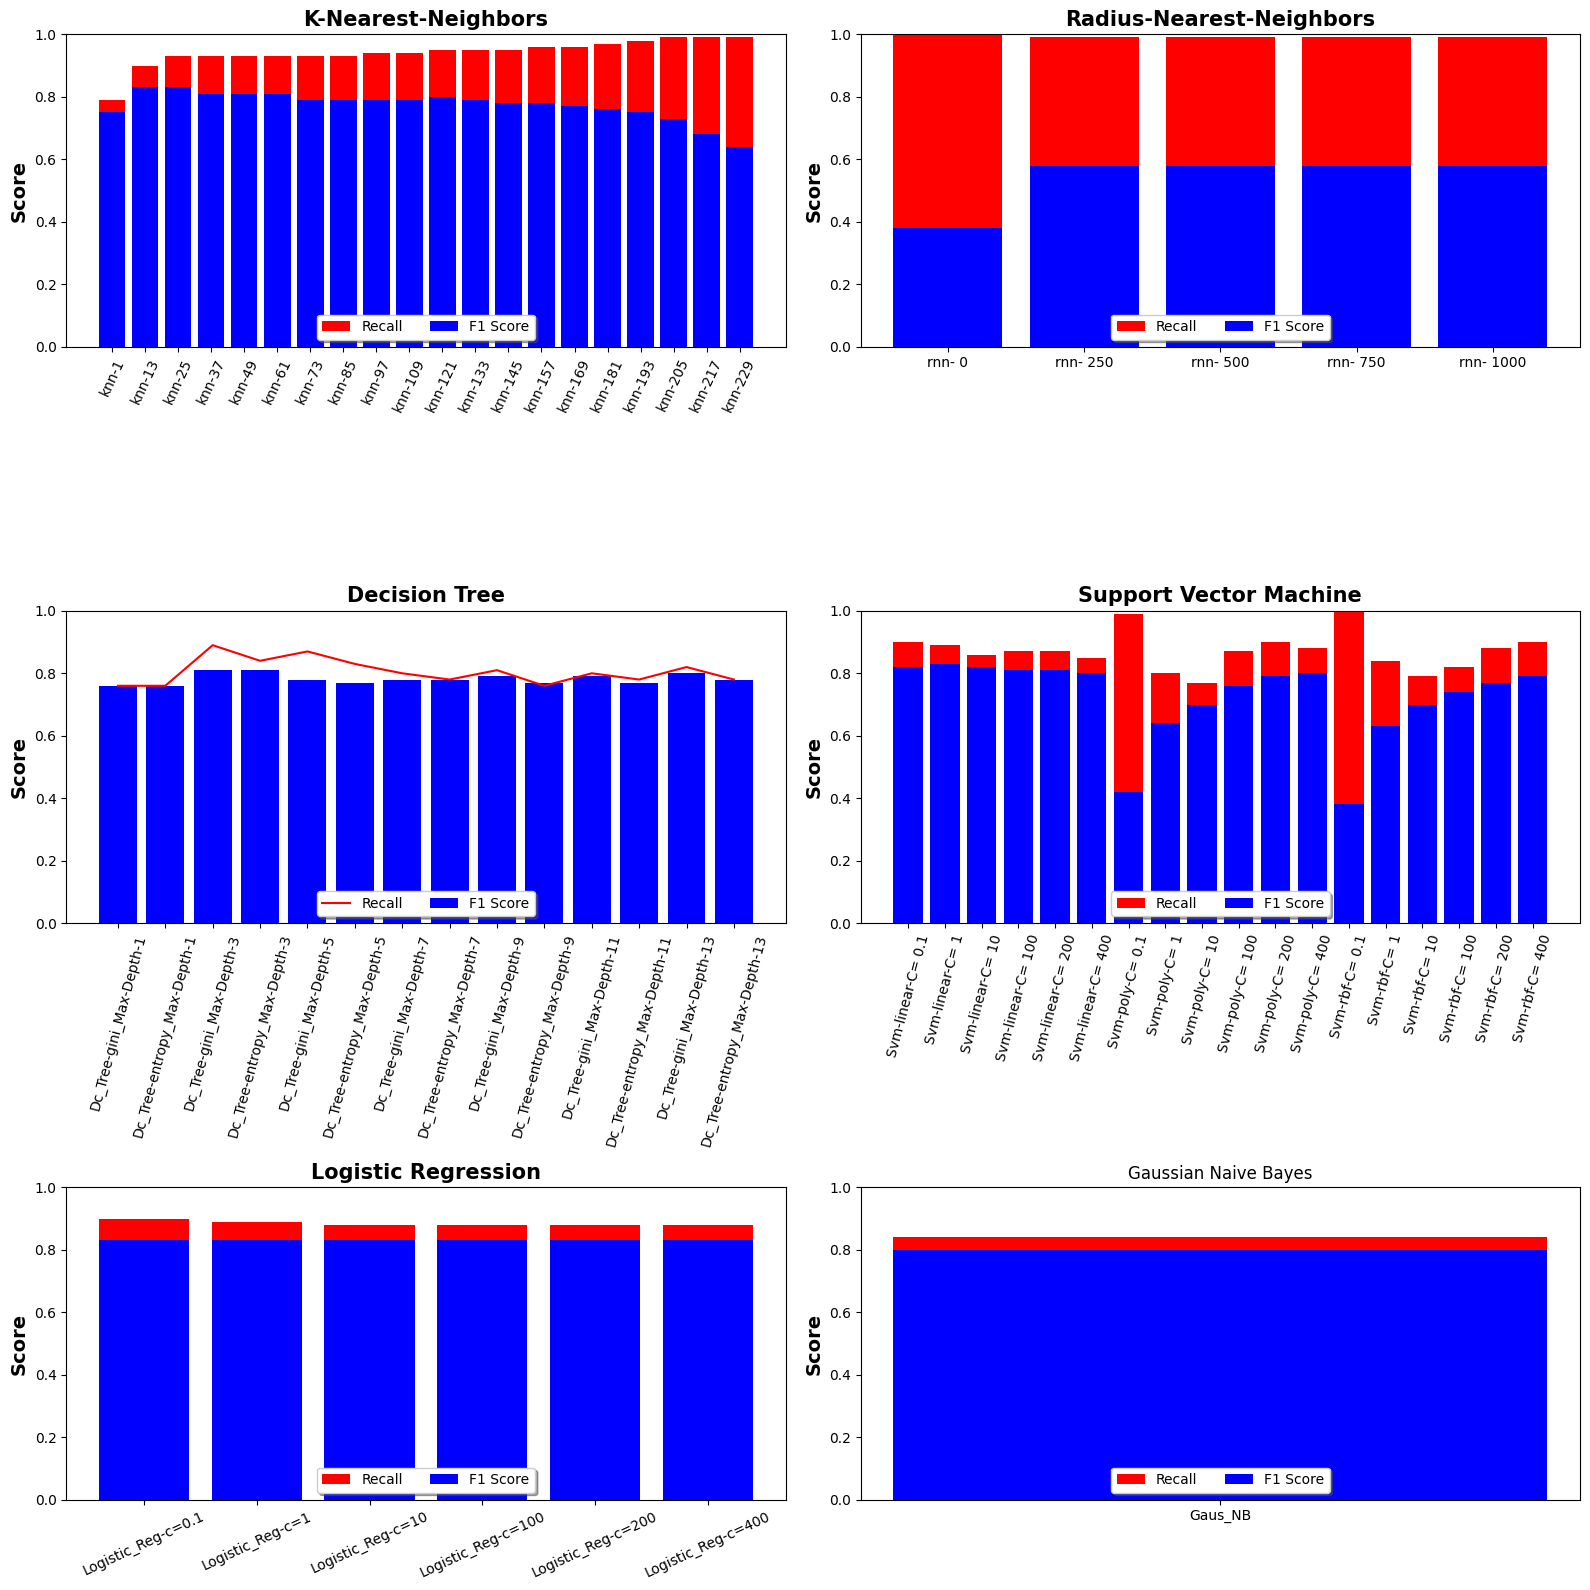

In [28]:
plt.figure(figsize=(16, 16))

plt.subplot(3, 2, 1)
plt.bar(knn_name, knn_rec, color='red', label='Recall')
plt.bar(knn_name, knn_f1, color='blue', label='F1 Score')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.title('K-Nearest-Neighbors', fontsize=15, fontweight='bold')
plt.xticks(rotation=65)                                                 # for long labels rotating allows name to be seen, while keeping proper positioning somewhat
plt.ylim([0, 1])
plt.legend(loc='lower center', fancybox=True, shadow=True, ncol=3)      # placing the legend in a location that doesn't obscure the data


plt.subplot(3, 2, 2)
plt.bar(rnn_name, rnn_rec, color='red', label='Recall')
plt.bar(rnn_name, rnn_f1, color='blue', label='F1 Score')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.title('Radius-Nearest-Neighbors', fontsize=15, fontweight='bold')
plt.xticks(rotation=0)
plt.ylim([0, 1])
plt.legend(loc='lower center', fancybox=True, shadow=True, ncol=3)

plt.subplot(3, 2, 3)
plt.plot(Dcsn_tr_name, Dcsn_tr_rec, color='red', label='Recall')      # this plot was the only one with the recall lower than f1 in some cases, obscuring the data, so 
                                                                      # we used a regular line plot that showed all the data. (there is a way of making the bars transparent as well)
plt.bar(Dcsn_tr_name, Dcsn_tr_f1, color='blue', label='F1 Score')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.title('Decision Tree', fontsize=15, fontweight='bold')
plt.xticks(rotation=75)
plt.ylim([0, 1])
plt.legend(loc='lower center', fancybox=True, shadow=True, ncol=3)

plt.subplot(3, 2, 4)
plt.bar(Sv_name, Sv_rec, color='red', label='Recall')
plt.bar(Sv_name, Sv_f1, color='blue', label='F1 Score')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.title('Support Vector Machine', fontsize=15, fontweight='bold')
plt.xticks(rotation=75)
plt.ylim([0, 1])
plt.legend(loc='lower center', fancybox=True, shadow=True, ncol=3)

plt.subplot(3, 2, 5)
plt.bar(Lg_reg_name, Lg_rec, color='red', label='Recall')
plt.bar(Lg_reg_name, Lg_f1, color='blue', label='F1 Score')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.title('Logistic Regression', fontsize=15, fontweight='bold')
plt.xticks(rotation=25)
plt.ylim([0, 1])
plt.legend(loc='lower center', fancybox=True, shadow=True, ncol=3)


plt.subplot(3, 2, 6)
plt.bar(gnb_name, gnb_rec, color='red', label='Recall')
plt.bar(gnb_name, gnb_f1, color='blue', label='F1 Score')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.title('Gaussian Naive Bayes')
plt.xticks(rotation=0)
plt.ylim([0, 1])
plt.legend(loc='lower center', fancybox=True, shadow=True, ncol=3)

plt.tight_layout()
plt.show


In [29]:
for i, j in results.items():
    print(f'{i}      F1 Score, Recall:  {j}')

Gaus_NB      F1 Score, Recall:  [0.8, 0.84]
knn-1      F1 Score, Recall:  [0.75, 0.79]
knn-13      F1 Score, Recall:  [0.83, 0.9]
knn-25      F1 Score, Recall:  [0.83, 0.93]
knn-37      F1 Score, Recall:  [0.81, 0.93]
knn-49      F1 Score, Recall:  [0.81, 0.93]
knn-61      F1 Score, Recall:  [0.81, 0.93]
knn-73      F1 Score, Recall:  [0.79, 0.93]
knn-85      F1 Score, Recall:  [0.79, 0.93]
knn-97      F1 Score, Recall:  [0.79, 0.94]
knn-109      F1 Score, Recall:  [0.79, 0.94]
knn-121      F1 Score, Recall:  [0.8, 0.95]
knn-133      F1 Score, Recall:  [0.79, 0.95]
knn-145      F1 Score, Recall:  [0.78, 0.95]
knn-157      F1 Score, Recall:  [0.78, 0.96]
knn-169      F1 Score, Recall:  [0.77, 0.96]
knn-181      F1 Score, Recall:  [0.76, 0.97]
knn-193      F1 Score, Recall:  [0.75, 0.98]
knn-205      F1 Score, Recall:  [0.73, 0.99]
knn-217      F1 Score, Recall:  [0.68, 0.99]
knn-229      F1 Score, Recall:  [0.64, 0.99]
rnn- 0      F1 Score, Recall:  [0.38, 1.0]
rnn- 250      F1 Score, R

In [23]:


def rr(x, y, n_folds, n_targets):
    # Initialize the Linear Regression model
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    
    # Perform cross-validation predictions
    predictions = cross_val_predict(model, x, y, cv=n_folds)
    
    # Initialize a dictionary for the target values
    targets = {i: [] for i in range(n_targets)}

    # Split the predictions based on the target values
    for i in range(len(y)):
        targets[y.iloc[i]].append(predictions[i])

    # Calculate the averages for each target
    averages = [np.mean(targets[i]) for i in range(n_targets)]

    # Calculate the cutoff points
    cutoffs = [(averages[i] + averages[i+1]) / 2 for i in range(n_targets - 1)]

    # Classify each prediction based on the cutoffs
    Ypredicted_classes = []
    for prediction in predictions:
        for i, cutoff in enumerate(cutoffs):
            if prediction <= cutoff:
                Ypredicted_classes.append(i)
                break
        else:
            Ypredicted_classes.append(n_targets - 1)
    
    return Ypredicted_classes
for i in range(5,60):
     print(f"F1 Score: {f1_score(y, rr(x, y, i, 2)):.2f},Recall Score: {recall_score(y, rr(x, y, i, 2), average='weighted'):.2f} Precision Score: {precision_score(y, rr(x, y, i, 2), average='weighted'):.2f} Accuracy Score: {accuracy_score(y, rr(x, y, i, 2)):.2f}")

F1 Score: 0.78,Recall Score: 0.76 Precision Score: 0.76 Accuracy Score: 0.76
F1 Score: 0.78,Recall Score: 0.75 Precision Score: 0.75 Accuracy Score: 0.75
F1 Score: 0.80,Recall Score: 0.78 Precision Score: 0.78 Accuracy Score: 0.78
F1 Score: 0.82,Recall Score: 0.80 Precision Score: 0.80 Accuracy Score: 0.80
F1 Score: 0.82,Recall Score: 0.80 Precision Score: 0.80 Accuracy Score: 0.80
F1 Score: 0.82,Recall Score: 0.80 Precision Score: 0.80 Accuracy Score: 0.80
F1 Score: 0.83,Recall Score: 0.80 Precision Score: 0.80 Accuracy Score: 0.80
F1 Score: 0.83,Recall Score: 0.80 Precision Score: 0.80 Accuracy Score: 0.80
F1 Score: 0.83,Recall Score: 0.81 Precision Score: 0.81 Accuracy Score: 0.81
F1 Score: 0.83,Recall Score: 0.81 Precision Score: 0.81 Accuracy Score: 0.81
F1 Score: 0.83,Recall Score: 0.81 Precision Score: 0.81 Accuracy Score: 0.81
F1 Score: 0.84,Recall Score: 0.82 Precision Score: 0.82 Accuracy Score: 0.82
F1 Score: 0.84,Recall Score: 0.82 Precision Score: 0.82 Accuracy Score: 0.82